# Worksheet 4
#### Name : Sabarno Saha 22MS037

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The methods used for solving ODE's used today are 
1. Euler Method : 
    $$ y_{n+1} = y_n + f(x_n,y_n)h$$
    $$\epsilon_{loc} = O(h^2) \\ \epsilon_{glob} = O(h)$$
    
2. Midpoint Method:
    $$ k1 = f(x_n,y_n)\\
       y_{n+1} = y_n + f(x_n+\frac{h}{2},y_n+\frac{k1}{2})h$$
       $$\epsilon_{loc} = O(h^3) \\ \epsilon_{glob} = O(h^2)$$

3. Runge-Kutta Method

$$
\quad\begin{aligned}[t]
k1 &= h f(x_n, y_n) \\
k2 &= h f(x_n + h/2, y_n + k1/2) \\
k3 &= h f(x_n + h/2, y_n + k2/2) \\
k4 &= h f(x_n + h, y_n + k3) \\
y_{n+1} &= y_{n} + (k1 + 2k2 + 2k3 + k4)/6
\end{aligned}$$
$$\epsilon_{loc} = O(h^5) \\ \epsilon_{glob} = O(h^4)$$

# Question 1

$$\frac{dx(t)}{dt} = -xt$$

Initial Conditions
$x(0) = 1.0$

In [2]:
def f1(t,x):
    y = -x*t
#     y = t
    return y

In [3]:
def euler(y,x,h,f=f1):
    yn = y +f(x,y)*h
    return yn
def midpoint(y,x, h, f=f1):
    k1 = h * f(x, y)
    return y + h * f(x + h / 2, y + k1 / 2)
def rk4(y,x,h,f=f1):
    k1 = h*f(x,y)
    k2 = h*f(x+h/2,y+k1/2)
    k3 = h*f(x+h/2,y+k2/2)
    k4 = h*f(x+h,y+k3)
    y_n = y + (k1+2*k2+2*k3+k4)/6
    return y_n

In [4]:
def call(meth,a,b,N,y0,f=f1): # call function Discretizes and generates method
    h = (b-a)/(N-1)
    ys = np.zeros((N, len(y0)))
    y,ys[0] = y0,y0
    xs = np.arange(a,b+h/2,h)
    for i in range(N):
        ys[i,:] = y # to allow for vector solutions
        y = meth(y,xs[i],h,f)
    return ys

In [5]:
a = 0 # t_initial 
b = 1# t final
h = 0.01# step size
N = int(1+ (b-a)/h)
xval = np.arange(a,b+h/2,h)
y0 = np.array([1.0])

In [6]:
## Exact Solution
y_exact = np.exp(-(xval**2)/2)

In [7]:
y_euler = call(euler,a,b,N,y0)
y_mid = call(midpoint,a,b,N,y0)
y_rk4 = call(rk4,a,b,N,y0)

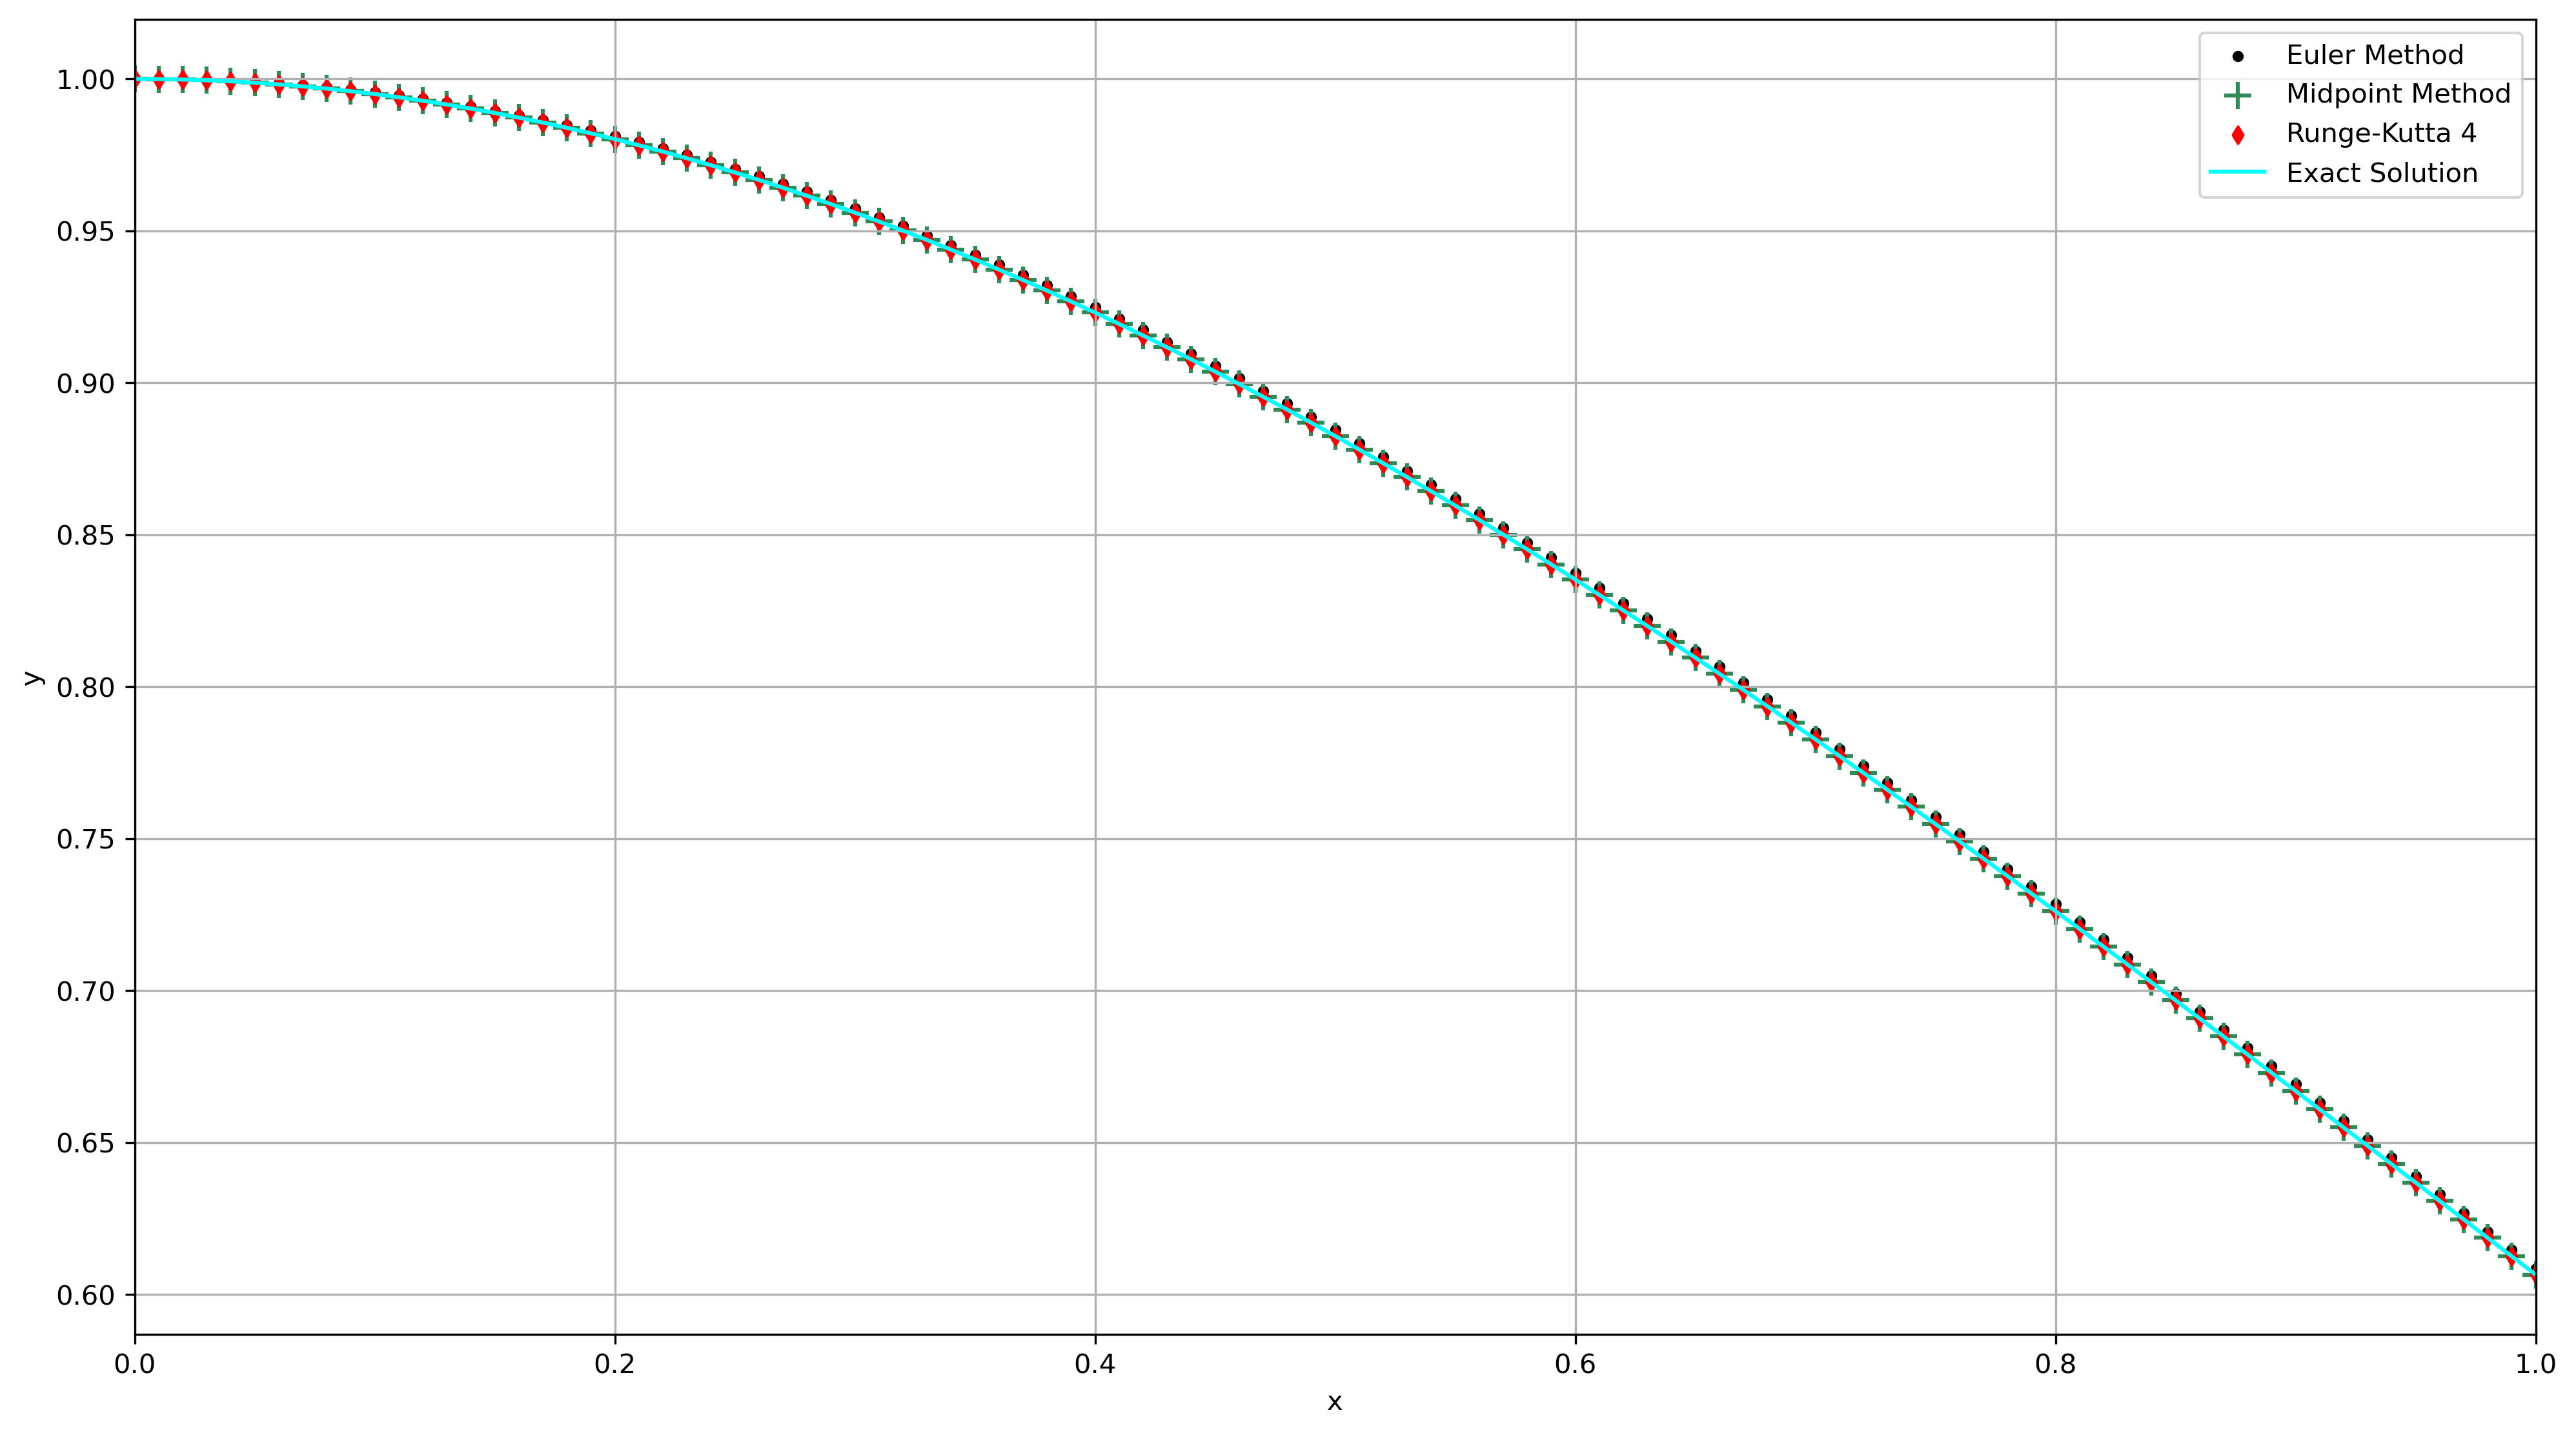

In [8]:
fig,axes = plt.subplots(1,1,figsize=(16,9), dpi=300)
axes.set_xlim([a,b])
axes.scatter(xval, y_euler, color ="black",label = "Euler Method", s=10)
axes.scatter(xval, y_mid, color= "seagreen", label = "Midpoint Method", marker= "+",s=100)
axes.scatter(xval, y_rk4, color = "red", label = "Runge-Kutta 4", marker = "d",s=20)
axes.plot(xval,y_exact, color = "cyan", label = "Exact Solution")
axes.grid()
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend()

In [9]:
n = np.arange(-4,-1.99,0.2)
h = 10**n
Narr = np.asarray(1+ (b-a)/h, dtype=int)
err_euler = np.zeros(len(n))
err_mid = np.zeros(len(n))
err_rk4 = np.zeros(len(n))

for i in range(0, len(n)):
    y_euler = call(euler,a,b,Narr[i],y0)
    y_mid = call(midpoint,a,b,Narr[i],y0)
    y_rk4 = call(rk4,a,b,Narr[i],y0)
    fye = y_euler[-1]
    fym = y_mid[-1]
    fyr = y_rk4[-1]
    comp1 = np.exp(-(b**2)/2)
    err_euler[i] = abs(fye -comp1)
    err_mid[i] = abs(fym - comp1)
    err_rk4[i] = abs(fyr - comp1)

/tmp/ipykernel_22843/3767669863.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  err_euler[i] = abs(fye -comp1)
/tmp/ipykernel_22843/3767669863.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  err_mid[i] = abs(fym - comp1)
/tmp/ipykernel_22843/3767669863.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  err_rk4[i] = abs(fyr - comp1)


In [10]:
def linfit(x,a,b):# linear fit function
    y = a*x+b
    return y

eup, eupcov = curve_fit(linfit,np.log10(h),np.log10(err_euler))
mdp, mdpcov = curve_fit(linfit,np.log10(h),np.log10(err_mid))
rkp, rkpcov = curve_fit(linfit,np.log10(h)[6:],np.log10(err_rk4)[6:])
eup,mdp,rkp
# Fit parameters. The slope is given by the first parameter

/tmp/ipykernel_22843/1802801252.py:7: RuntimeWarning: divide by zero encountered in log10
  rkp, rkpcov = curve_fit(linfit,np.log10(h)[6:],np.log10(err_rk4)[6:])


(array([ 1.0024874 , -0.68539466]),
 array([ 2.00383822, -1.28266651]),
 array([ 3.98443327, -3.10552047]))

In [11]:
errx = np.linspace(n[0],n[-1],500)
eufit = linfit(errx, *eup)
mdfit = linfit(errx, *mdp)
rkfit = linfit(errx, *rkp)

/tmp/ipykernel_22843/1128488111.py:8: RuntimeWarning: divide by zero encountered in log10
  axes2.scatter(np.log10(h),np.log10(err_rk4), label = "log plot in error of rk4")


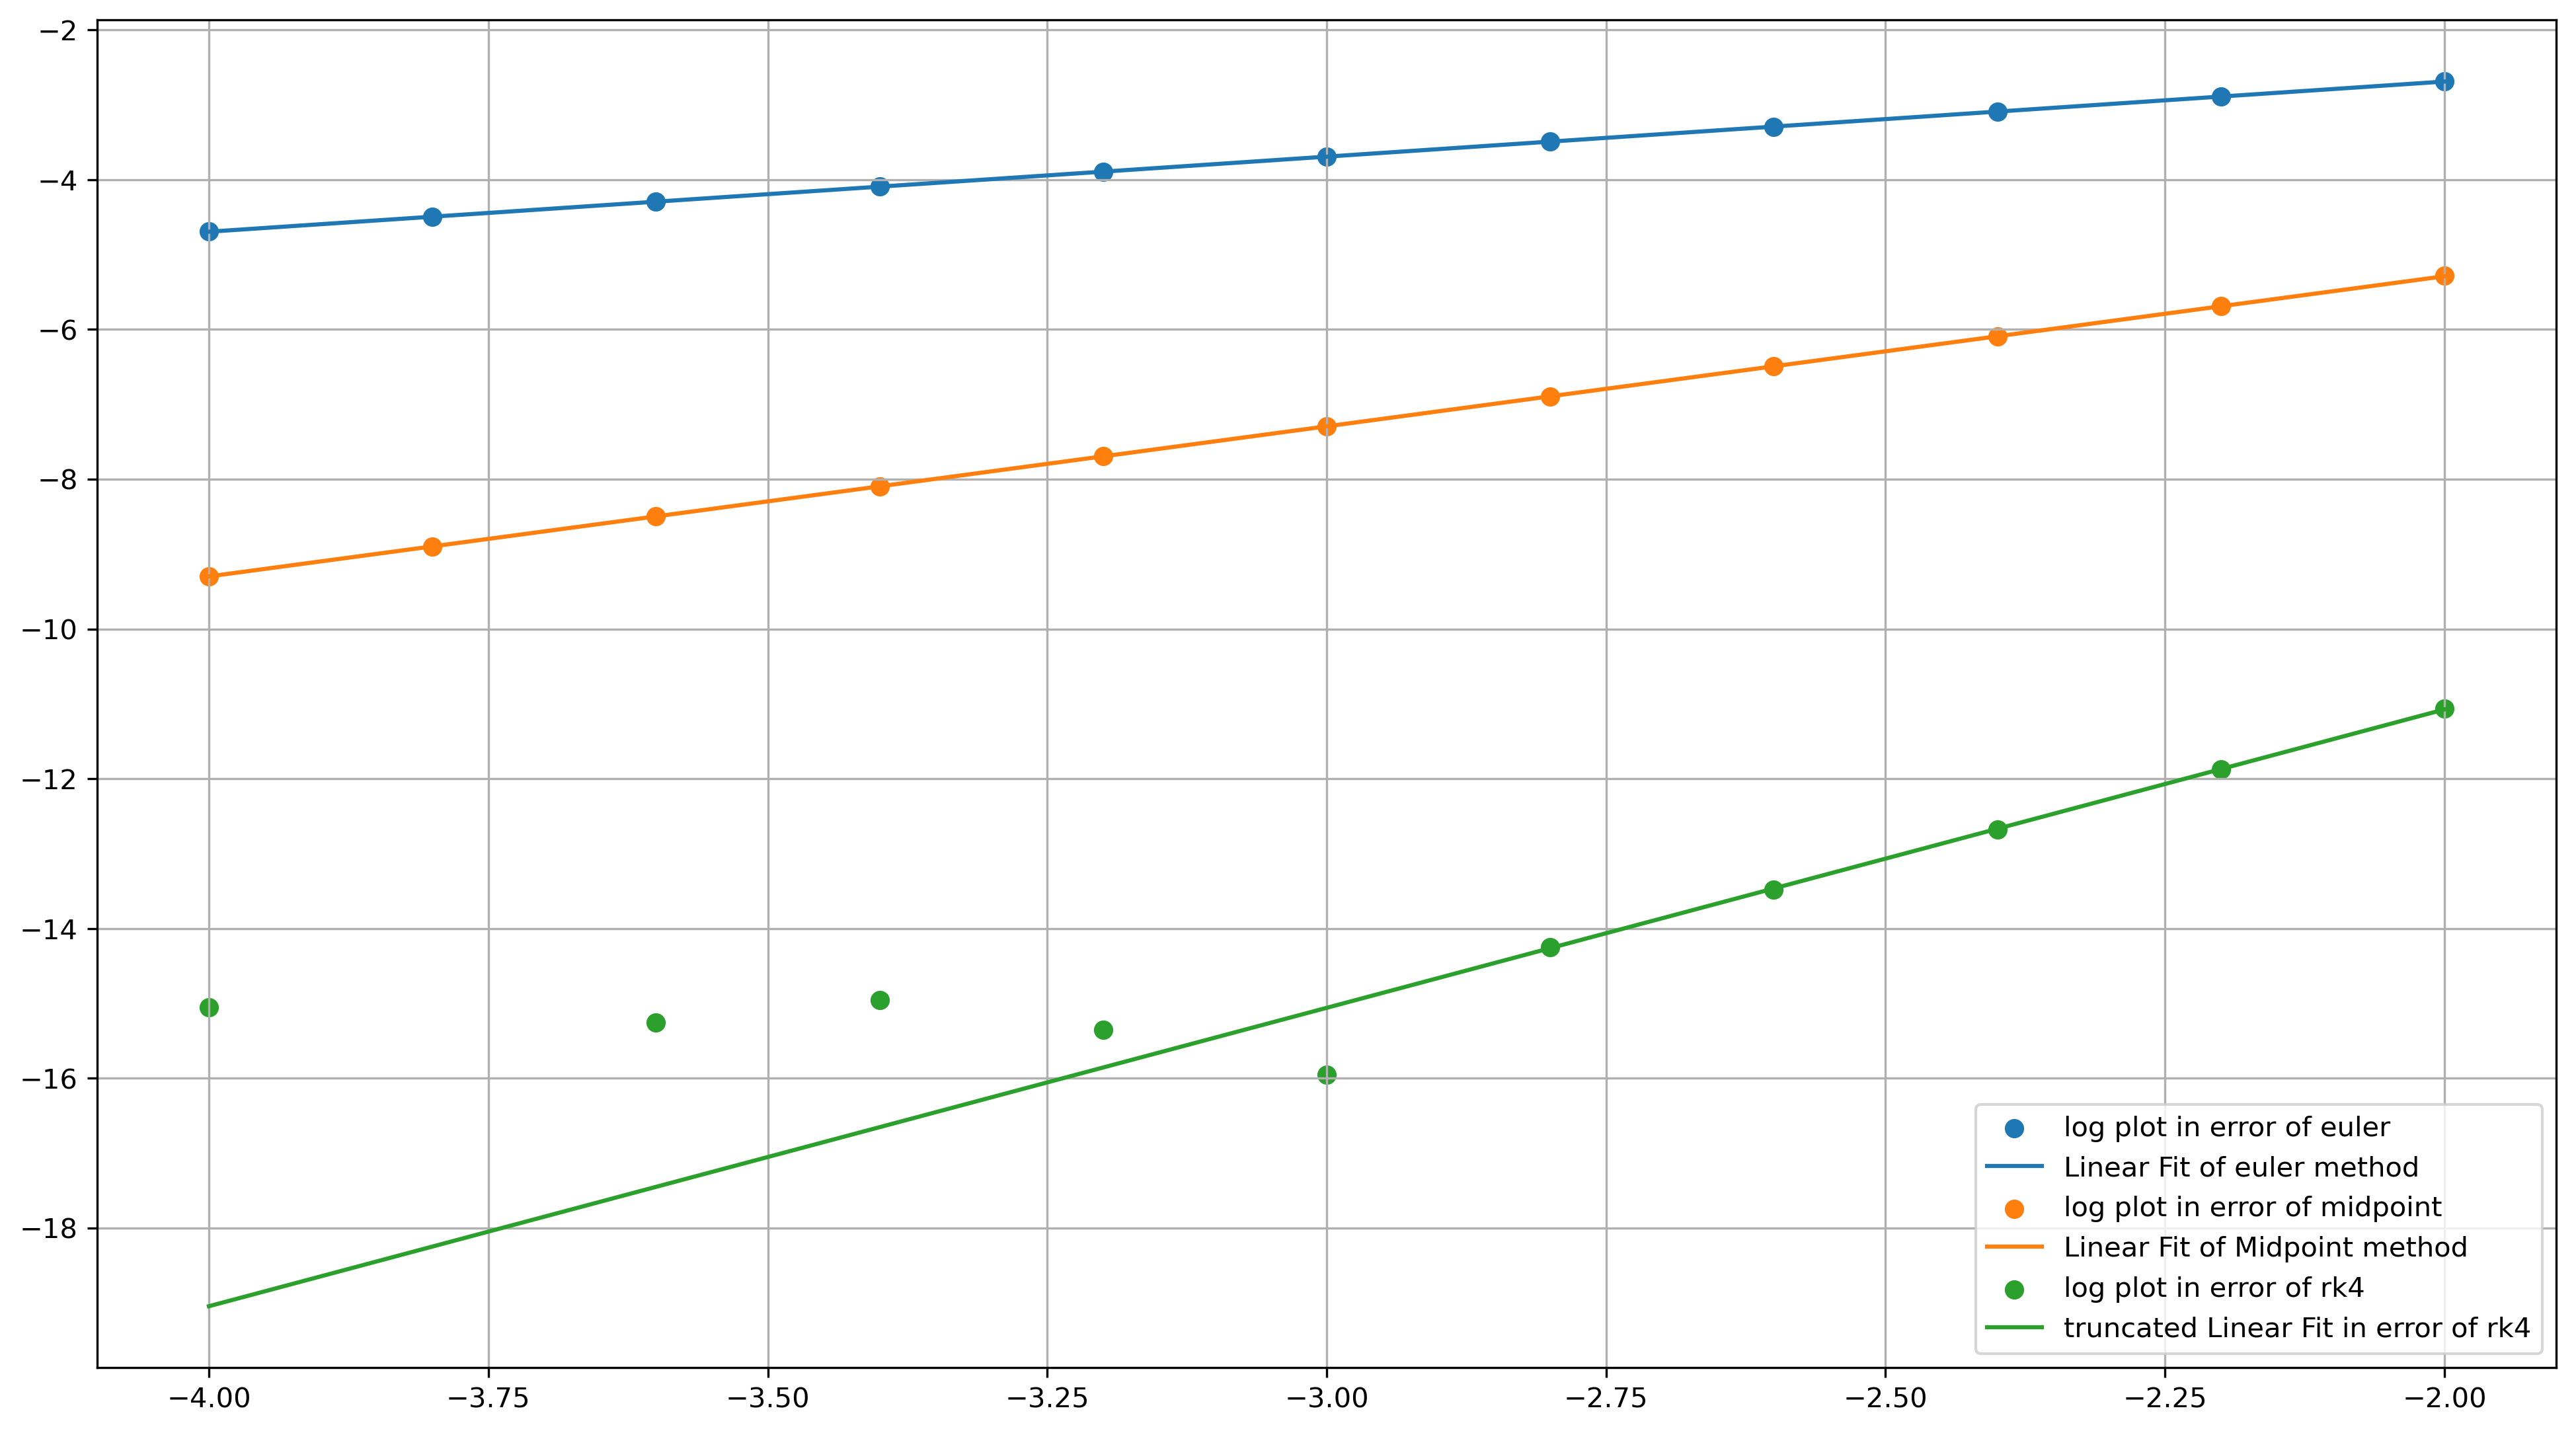

In [12]:
fig2,axes2 = plt.subplots(1,1,figsize=(16,9), dpi=300)
axes2.scatter(np.log10(h),np.log10(err_euler), label = "log plot in error of euler")
axes2.plot(errx, eufit, label = "Linear Fit of euler method")

axes2.scatter(np.log10(h),np.log10(err_mid), label= "log plot in error of midpoint")
axes2.plot(errx, mdfit, label="Linear Fit of Midpoint method")

axes2.scatter(np.log10(h),np.log10(err_rk4), label = "log plot in error of rk4")
axes2.plot(errx, rkfit, label = "truncated Linear Fit in error of rk4")

axes2.grid()
axes2.legend()

## Q2

The exact solutions for the p and y equations are
$$p = -2 \pi \sin(2 \pi t) \\ y = \cos(2\pi t)$$


In [13]:
def f2(x,y):
    f = np.array([y[1],-4*np.pi**2*y[0]])
    return f

In [14]:
h = 0.01
t0 = 0.0
t1 = 15

N = int(1+ (t1-t0)/h)

xs = np.arange(t0, t1+h/2, h)  # Generate range of x values

y_ini = np.asarray([1.0, 0.0])  # Initial condition

# Call the methods
ysE = call(euler, t0,t1,N, y_ini, f=f2)
ysm = call(midpoint, t0,t1,N,y_ini, f=f2)
ysrk4 = call(rk4, t0,t1,N,y_ini,f=f2)

In [15]:
# Exact solutions

y_ex = np.cos(2*np.pi*xs)
p_ex = -2*np.pi*np.sin(2*np.pi*xs)

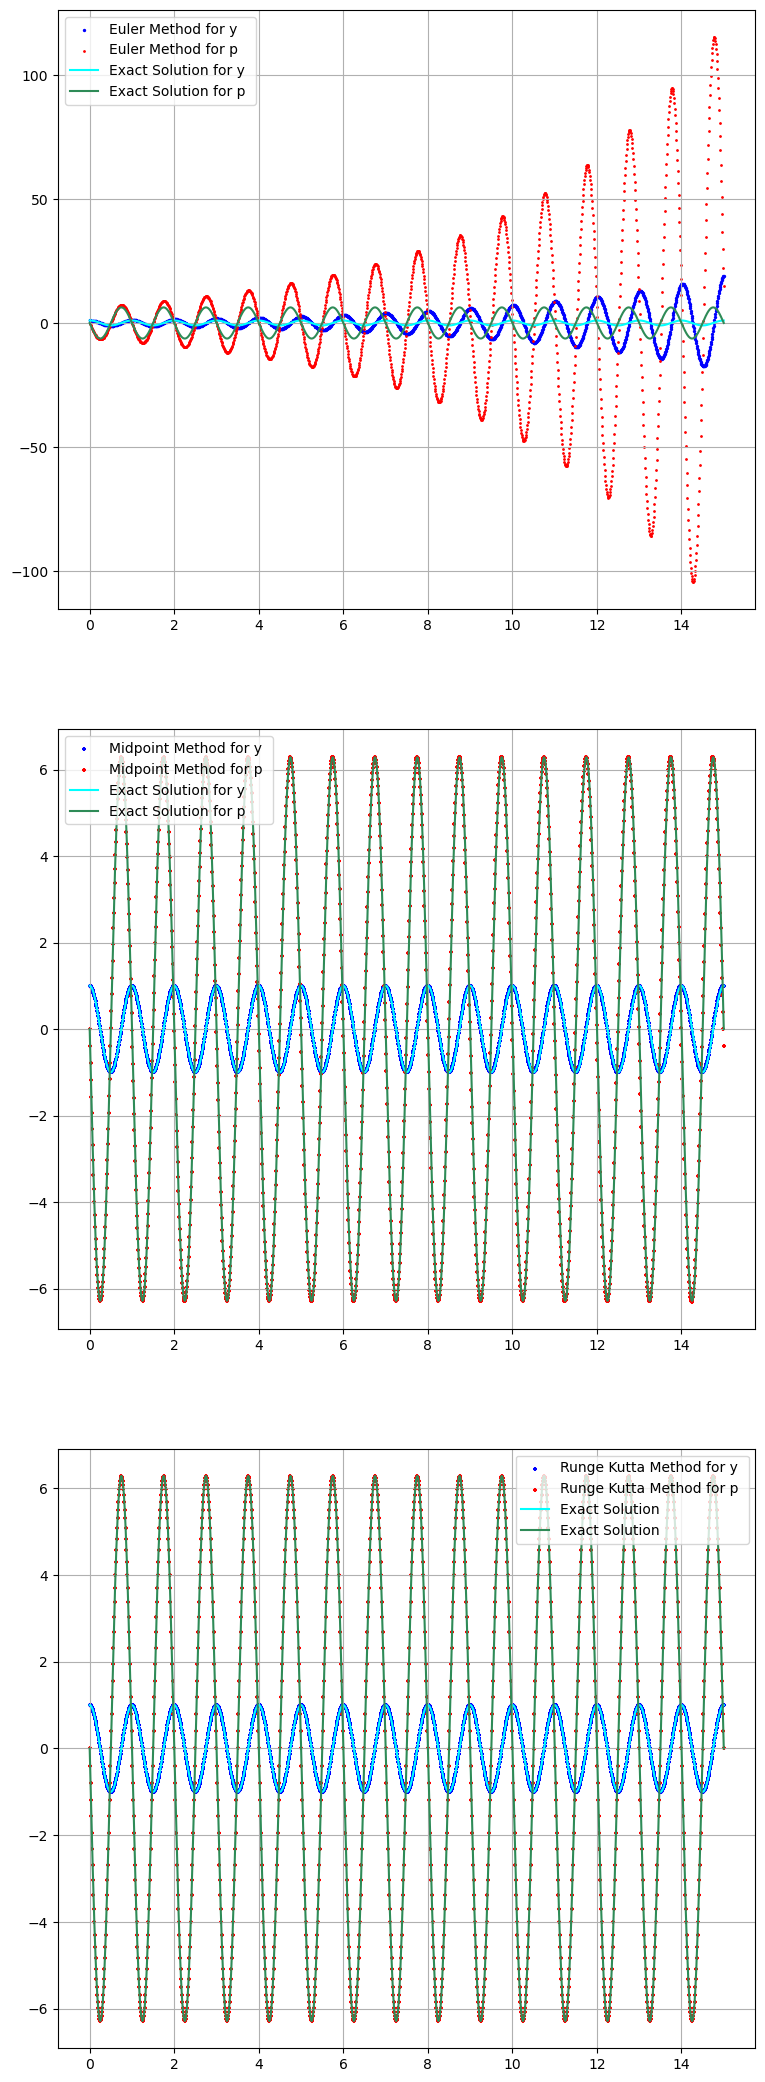

In [16]:
# Plots generated by each method

fig3,axes3 = plt.subplots(3,1,figsize=(9,9*3), dpi=100)
axes3[0].scatter(xs, ysE[:,0], color ="blue",label = "Euler Method for y ", s=2)
axes3[0].scatter(xs, ysE[:,1], color ="red",label = "Euler Method for p ", s=1)
axes3[0].plot(xs,y_ex, color = "cyan", label = "Exact Solution for y ")
axes3[0].plot(xs,p_ex, color = "seagreen", label = "Exact Solution for p ")

axes3[1].scatter(xs, ysm[:,0], color= "blue", label = "Midpoint Method for y ", marker= "+",s=5)
axes3[1].scatter(xs, ysm[:,1], color= "red", label = "Midpoint Method for p ", marker= "+",s=10)
axes3[1].plot(xs,y_ex, color = "cyan", label = "Exact Solution for y ")
axes3[1].plot(xs,p_ex, color = "seagreen", label = "Exact Solution for p ")

axes3[2].scatter(xs, ysrk4[:,0], color= "blue", label = "Runge Kutta Method for y ", marker= "+",s=5)
axes3[2].scatter(xs, ysrk4[:,1], color= "red", label = "Runge Kutta Method for p ", marker= "+",s=10)
axes3[2].plot(xs,y_ex, color = "cyan", label = "Exact Solution")
axes3[2].plot(xs,p_ex, color = "seagreen", label = "Exact Solution")

for ax in fig3.get_axes():
    ax.legend()
    ax.grid()

### Calculation of Errors in the Momentum Solution

In [17]:
n = np.arange(-4,-1.99,0.2)
h = 10**n
t1 = 14.75 # change in endpoints some justification is given  below
Narr = np.asarray(1+ (t1-t0)/h, dtype=int)
p_err_euler = np.zeros(len(n))
p_err_mid = np.zeros(len(n))
p_err_rk4 = np.zeros(len(n))

for i in range(0, len(n)):
    ysE = call(euler, t0,t1,Narr[i], y_ini, f=f2)
    ysm = call(midpoint, t0,t1,Narr[i],y_ini, f=f2)
    ysrk4 = call(rk4, t0,t1,Narr[i],y_ini,f=f2)
    fye = ysE[-1,1]
  
    fym = ysm[-1,1]
    fyr = ysrk4[-1,1]
    comp = -2*np.pi*np.sin(2*np.pi*t1)# calculation of actual value at endpoint
    p_err_euler[i]=abs(fye - comp)
    p_err_mid[i] = abs(fym - comp)
    p_err_rk4[i] = abs(fyr - comp)


In [18]:
# fitting
peup, peupcov = curve_fit(linfit,np.log10(h),np.log10(p_err_euler))
pmdp, pmdpcov = curve_fit(linfit,np.log10(h),np.log10(p_err_mid))
prkp, prkpcov = curve_fit(linfit,np.log10(h),np.log10(p_err_rk4))
# Fit parameters for momentum errors
peup, pmdp,prkp



(array([1.30633654, 4.35759018]),
 array([2.83387403, 3.66700695]),
 array([4.7270125 , 3.90842312]))

In [19]:
errx = np.linspace(n[0],n[-1],500)
peufit = linfit(errx, *peup)
pmdfit = linfit(errx, *pmdp)
prkfit = linfit(errx, *prkp)

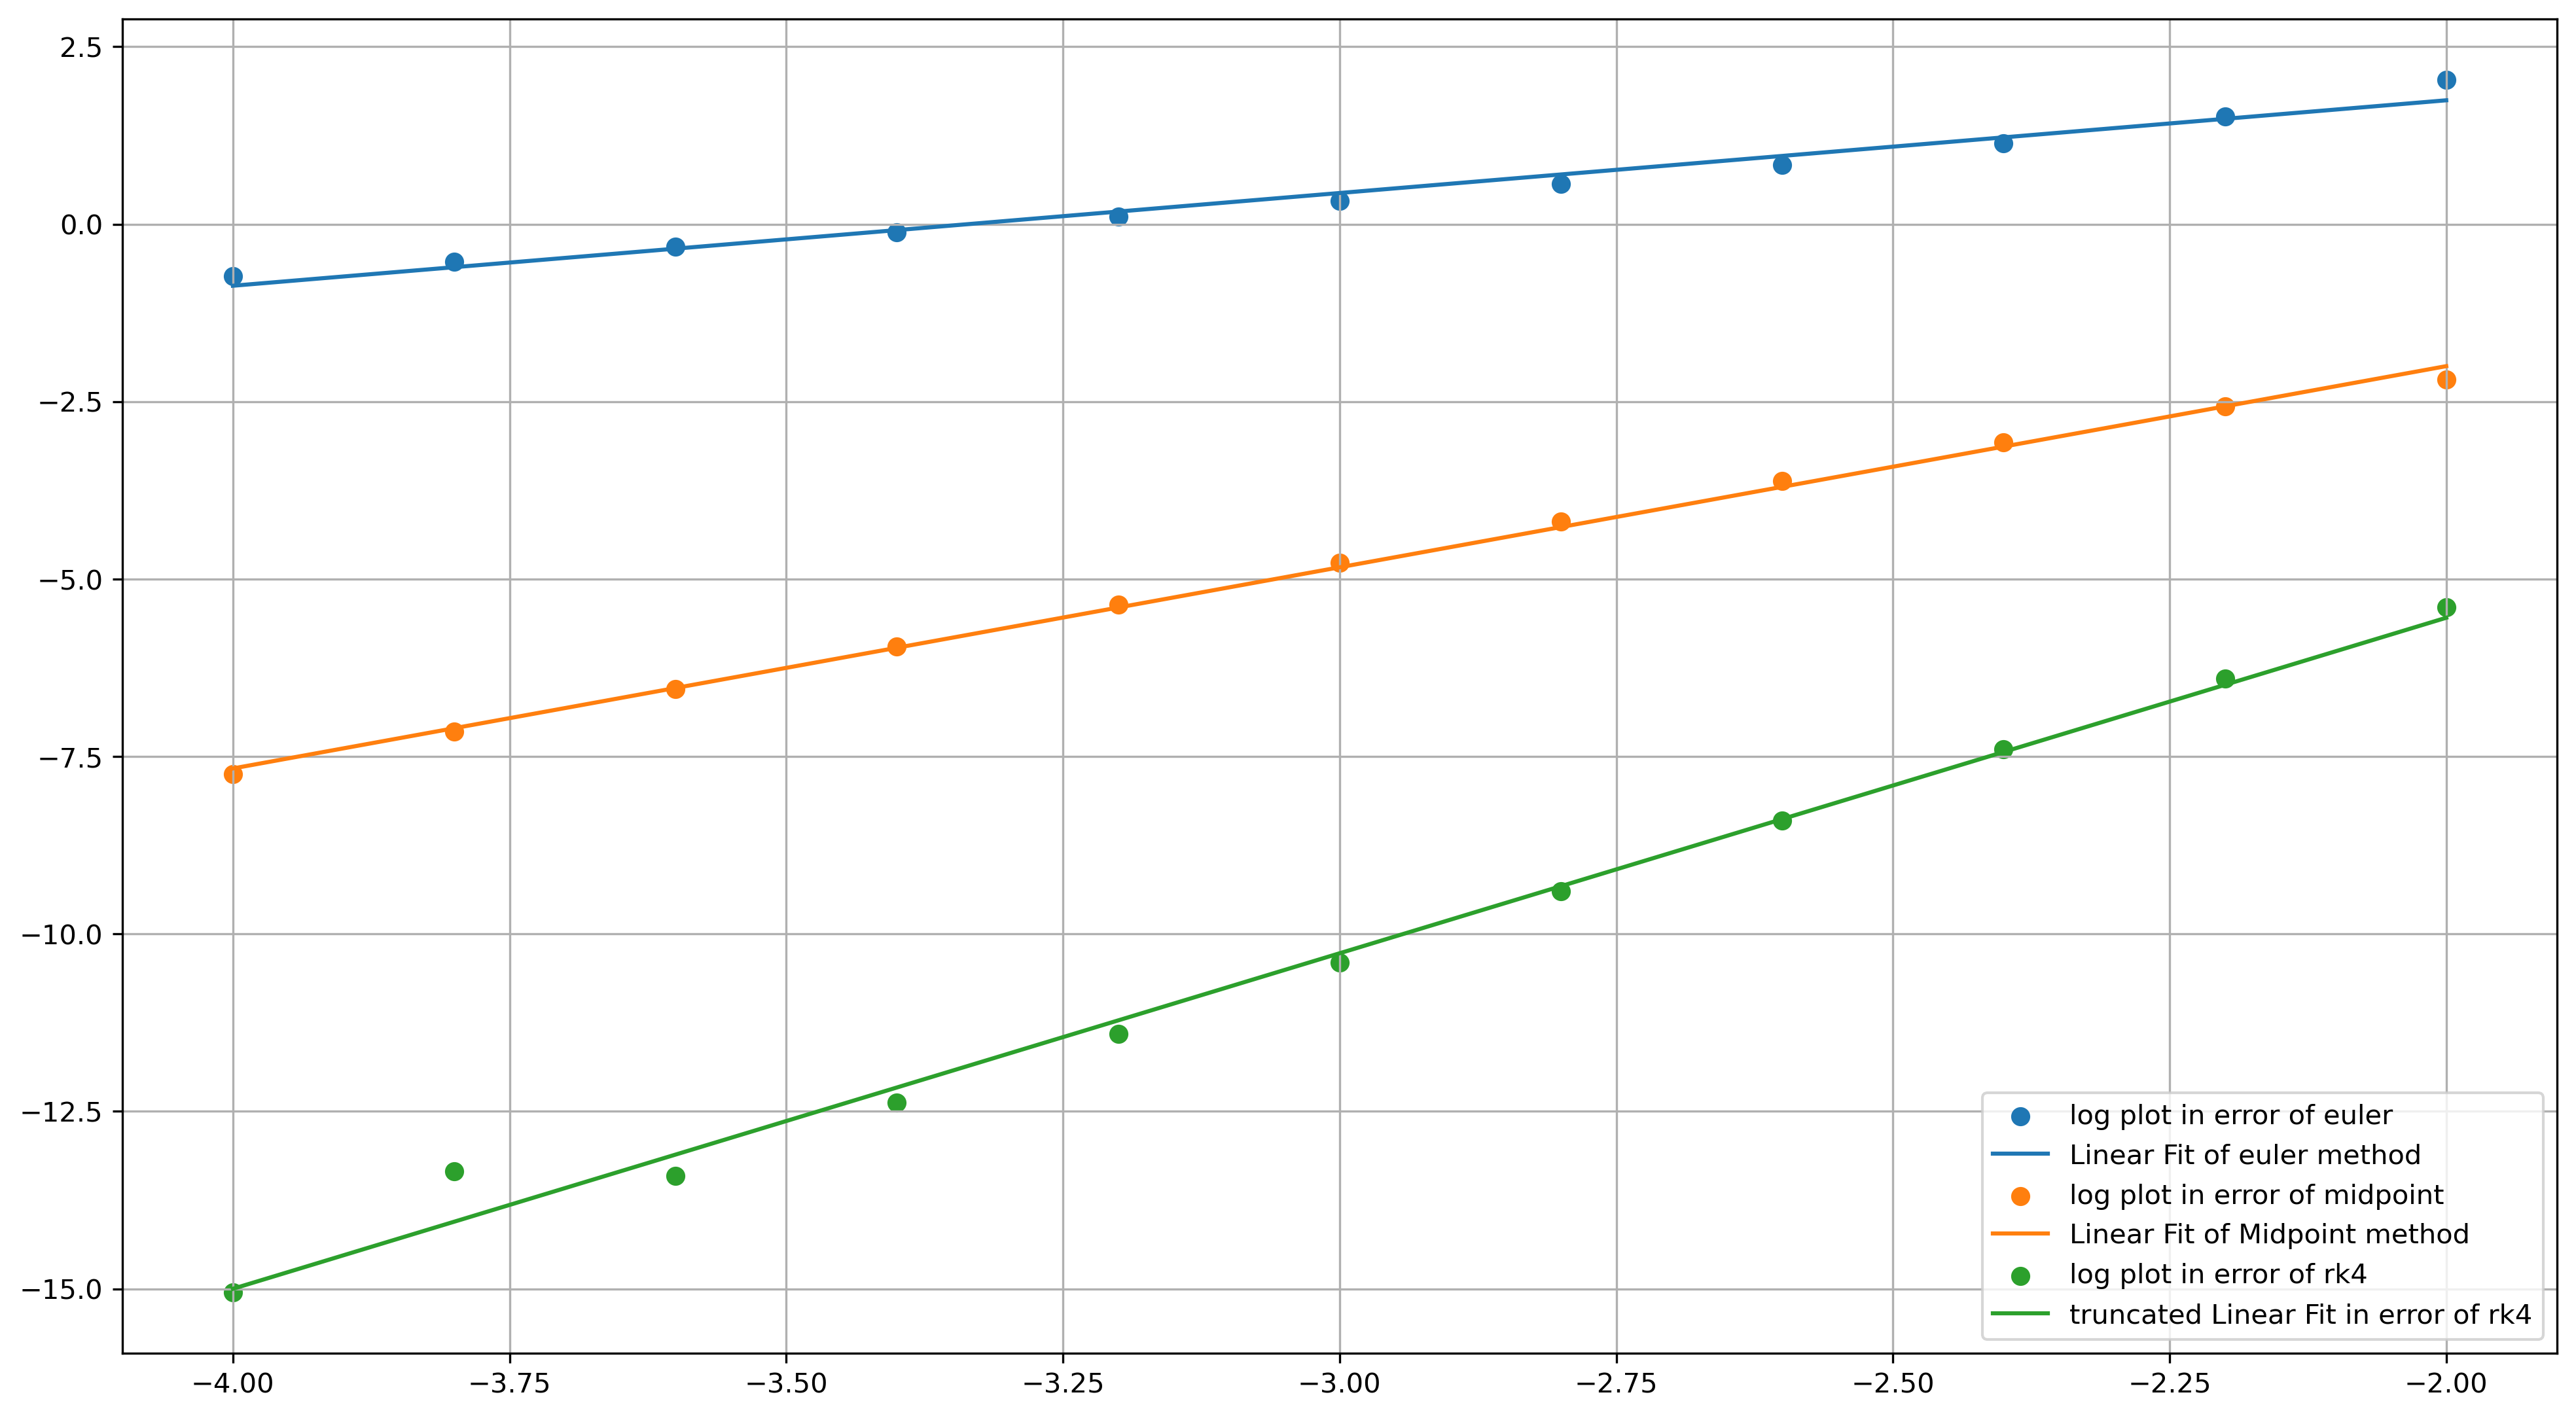

In [20]:
fig2,axes2 = plt.subplots(1,1,figsize=(16,9), dpi=300)
axes2.scatter(np.log10(h),np.log10(p_err_euler), label = "log plot in error of euler")
axes2.plot(errx, peufit, label = "Linear Fit of euler method")

axes2.scatter(np.log10(h),np.log10(p_err_mid), label= "log plot in error of midpoint")
axes2.plot(errx, pmdfit, label="Linear Fit of Midpoint method")

axes2.scatter(np.log10(h),np.log10(p_err_rk4), label = "log plot in error of rk4")
axes2.plot(errx, prkfit, label = "truncated Linear Fit in error of rk4")

axes2.grid()
axes2.legend()

### Calculation of Errors in Position Solution

In [21]:
t1 = 15
n = np.arange(-4,-1.99,0.2)
h = 10**n
Narr = np.asarray(1+ (t1-t0)/h, dtype=int)
# print(Narr)
y_err_euler = np.zeros(len(n))
y_err_mid = np.zeros(len(n))
y_err_rk4 = np.zeros(len(n))

for i in range(0, len(n)):
    ysE = call(euler, t0,t1,Narr[i], y_ini, f=f2)
    ysm = call(midpoint, t0,t1,Narr[i],y_ini, f=f2)
    ysrk4 = call(rk4, t0,t1,Narr[i],y_ini,f=f2)
    fye = ysE[-1,0]
  
    fym = ysm[-1,0]
    fyr = ysrk4[-1,0]
    comp = np.cos(2*np.pi*t1)
    y_err_euler[i]=abs(fye - comp)
    y_err_mid[i] = abs(fym - comp)
    y_err_rk4[i] = abs(fyr - comp)


In [25]:
yeup, yeupcov = curve_fit(linfit,np.log10(h),np.log10(y_err_euler))
ymdp, ymdpcov = curve_fit(linfit,np.log10(h),np.log10(y_err_mid))
yrkp, yrkpcov = curve_fit(linfit,np.log10(h)[2:],np.log10(y_err_rk4)[2:])
yeup,ymdp,yrkp
# Fit parameters the first index denotes the slope 


(array([1.31225563, 3.58780042]),
 array([2.82940301, 2.86046413]),
 array([4.88945091, 3.53669916]))

In [26]:
errx = np.linspace(n[0],n[-1],500)
yeufit = linfit(errx, *yeup)
ymdfit = linfit(errx, *ymdp)
yrkfit = linfit(errx, *yrkp)

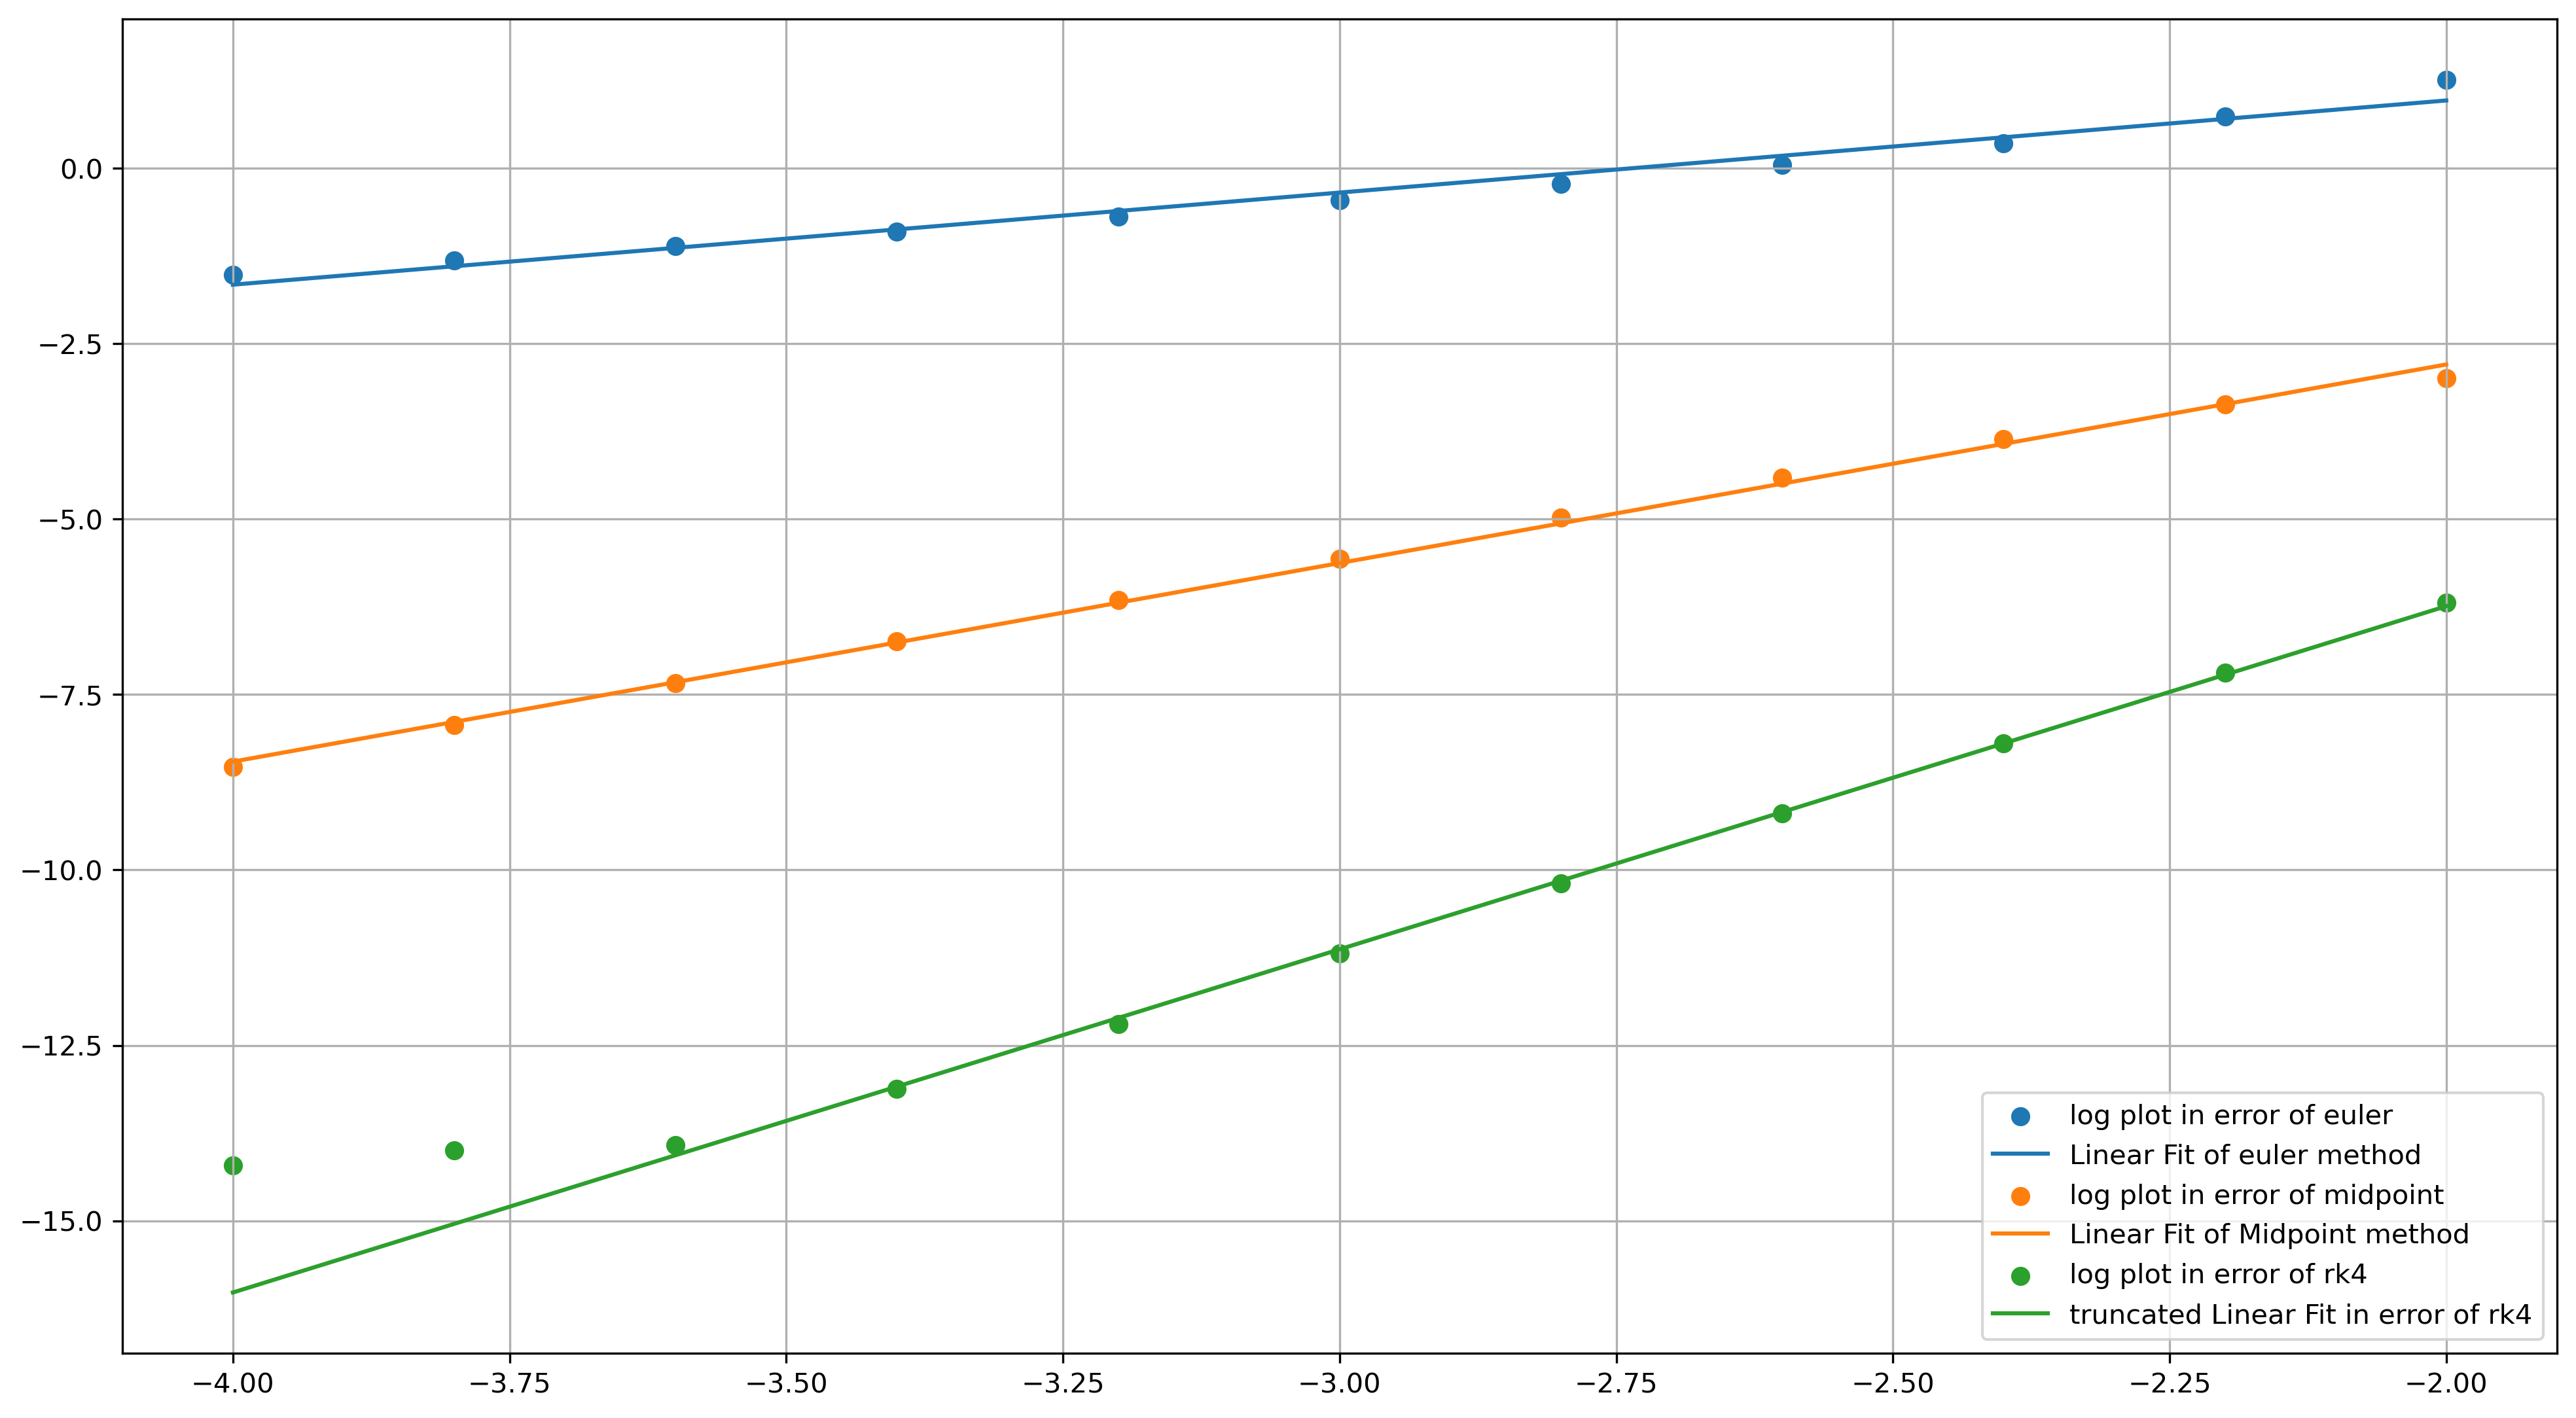

In [27]:
fig2,axes2 = plt.subplots(1,1,figsize=(16,9), dpi=300)
axes2.scatter(np.log10(h),np.log10(y_err_euler), label = "log plot in error of euler")
axes2.plot(errx, yeufit, label = "Linear Fit of euler method")

axes2.scatter(np.log10(h),np.log10(y_err_mid), label= "log plot in error of midpoint")
axes2.plot(errx, ymdfit, label="Linear Fit of Midpoint method")

axes2.scatter(np.log10(h),np.log10(y_err_rk4), label = "log plot in error of rk4")
axes2.plot(errx, yrkfit, label = "truncated Linear Fit in error of rk4")

axes2.grid()
axes2.legend()

Note:  The error fit parameters vary with the end points. The errors obey theoretical consideration when it is at a peak. So the endpoints have been shifted to make the endpoints the peaks.